<center>
<img src='https://imgs.xkcd.com/comics/t_distribution_2x.png' align='center' width="800x">
</center>

# Андан на экономе

## Семинар 6:  Чего хочет статистик?

Когда статистик оценивает какой-нибудь параметр, он хочет: 

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую нормальность__ оценки.

В этой тетрадке поговорим про несмещённость. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

__Определение:__  Оценка $\hat{\theta}$ параметра $\theta$ называется __несмещённой,__ если $\mathbb{E} (\hat{\theta}) = \theta$.

## 1. Несмещённые мамонтоборцы 

В долине летучей мыши Шикака живёт племя Вачати. Оно охотится на мамонтов. Древний Бог Оньянкопонга не так давно сгенерировал в долине реки из нормального распределения $10$ тысяч мамонтов со средним весом $300$ кг и стандартным отклонением $100$ кг. 

In [2]:
norm_rv = stats.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**4)

np.mean(x_mamont) # настоящее среднее

299.1862327741454

* Шаман Одэхингум (лёгкое колебание воды) уверен в своём взоре: 

$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

* Шаман Пэпина (виноградная лоза, растущая вокруг дуба) не любит, когда его избивают за слишком оптимистичные прогнозы:

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

* Шаман Апониви (где ветер вырывает промежуток с корнем) тоже коректирует прогноз:

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

In [3]:
# Команда нам не подходит, так как она всю матрицу сделает без повторений
# np.random.choice(x_mamont, size=(n,m), replace=False)

n = 100

th_od = np.zeros(200)
th_pe = np.zeros(200)
th_ap = np.zeros(200)

for i in range(200):
    x_sample = np.random.choice(x_mamont, size=n, replace=False)
    x_mean = np.mean(x_sample)
    th_od[i] = x_mean
    th_pe[i] = x_mean - 4200/n
    th_ap[i] = x_mean - 5*(n+1)/n  


In [4]:
# посмотрим на оценки E(\hat \theta)
np.mean(th_od), np.mean(th_pe), np.mean(th_ap)

(299.1963134839845, 257.1963134839845, 294.1463134839845)

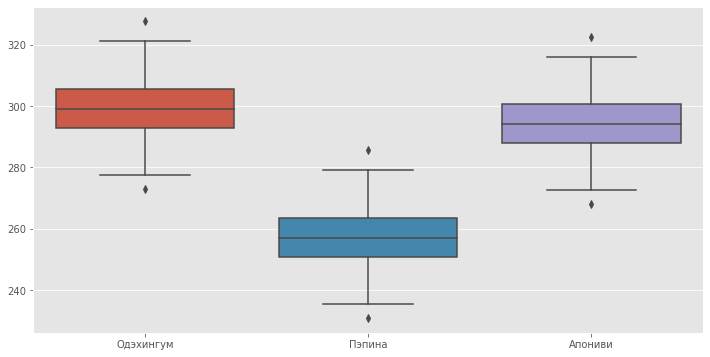

In [5]:
plt.figure(figsize=(12,6))

df = pd.DataFrame(zip(th_od, th_pe, th_ap), columns = ['Одэхингум', 'Пэпина', 'Апониви'])
sns.boxplot(data = df,);

Давайте попробуем посмотреть, как ведут себя распределения оценок шаманов в динамике, при росте числа наблюдений.


<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_boxplot.gif" width="400"> 
</center>


Напоминание про ящик с усами: 

<center>
<img src="./Densityvsbox.png" width="500"> 
</center>

Хех. Шаманы. Детский сад. Подавай нам что-нибудь из бизнеса. Окей, договорились. Давайте предположим, что шаманы прогнозируют не вес мамонта, а то на какую сумму в среднем будут наступать страховые случаи. Ясное дело, что наш  бюджет на статистические исследования довольно сильно ограничен. И ежедневно мы можем собирать информацию только от ограниченного числа респондентов. Если мы стабильно будем на основе этой информации получать смещённую оценку страхового покрытия, то вместо получения прибыли в среднем, мы легко можем оказаться банкротами. 

__Ещё раз, ещё раз:__ несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 

## 2. Состоятельность 

__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __состоятельной,__ если $\hat \theta \to \theta$ по вероятности при росте $n$. 

__Шаманы и их оценки:__

\begin{equation*}
\begin{aligned}
& \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i \\
& \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n} \\
& \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n} \\
\end{aligned}
\end{equation*}

In [ ]:
theta_hat = np.zeros((100, 50))

for n in range(100, 10100, 100): # поднимаемся выше и видим больше мамонтов
    
    # 50 выборок с повторениями для простоты 
    x_sample = np.random.choice(x_mamont, size = (n, 50), replace=False)
    
    # 50 разных оценок 
    x_mean = np.mean(x_sample, axis=0) 
    
    theta_hat[n//100 - 1] = x_mean                # состоятельная
    #theta_hat[n//100 - 1] = (x_mean - 4200/n)     # состоятельная
    #theta_hat[n//100 - 1] = (x_mean - 5*(n+1)/n)   # несостоятельная 

In [ ]:
theta_hat.shape

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(theta_hat, c='grey', alpha = 0.3)

plt.xlabel('Количество наблюдений', size=24)
plt.ylabel('Оценка параметра', size=24)

plt.hlines(theta_real, 0, 100, color='blue', lw=4, label='реальное значение')
plt.legend(fontsize=20);

__Ещё раз, ещё раз:__ нельзя путать состоятельности и несмещённость. Состоятельность означает, что мы при расширении выборки приходим к истине. Несмещённость, что мы при фиксированном размере выборке в среднем не ошибаемся. Состоятельность это то свойство оценки, за которое стоит бороться. Без этого свойства нет никакого смысла использовать оценку. 

## 3. Эффективность 

Предположим, что у нас есть две оценки. Они обе классные, несмещённые и состоятельные. Возникает вопрос: а какую взять то? Для того, чтобы выбрать, вводят свойство эффективности. 

__Определение:__ Оценка $\hat \theta$ параметра $\theta$ называется __эффективной в некотором классе оценок,__ если её дисперсия, $Var(\hat \theta)$ в этом классе оценок, при заданном объёме выборке минимальна. 

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.

### Две оценки

У нас есть выборка $x_1, \ldots, x_n \sim iid \hspace{2mm} U[0; \theta]$. Мы оценили параметр $\theta$ двумя способами. Методом моментов и методом максимального правдоподобия: 


$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_{ML} = \frac{n+2}{n} \cdot x_{max}$$

Обе оценки оказались несмещёнными и состоятельными. Какую из них выбрать? Ответ прост: надо понять какая из них эффективнее.  

Сгенерируйте выборку оценок каждого вида. Постройте по ним гистограммы и найдите этот простой ответ.

In [ ]:
uniform_rv = stats.uniform(0, 5)

In [ ]:
n_obs = 100

# 1000 выборок размера n_obs
x = uniform_rv.rvs(size = (n_obs, 1000))
x.shape

In [ ]:
# первая оценка 
theta_1 = 2*np.mean(x, axis=0)

# вторая оценка 
theta_2 = (n_obs + 2)/n_obs*np.max(x, axis=0)

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(theta_1, bins=100, alpha=0.5, label='Moment method')
plt.hist(theta_2, bins=50, alpha=0.5, label='ML method')
plt.legend();

Видим, что у оценки максимального правдоподобия разброс оказался меньше.  

In [ ]:
np.var(theta_1)

In [ ]:
np.var(theta_2)

На практике следовало бы выбрать её. Когда у оценки самый маленький разброс в каком-то классе (например, в классе несмещённых оценок), её называют __эффективной__ в этом классе. 

Кстати говоря, для оценок из этого упражнения, можно руками выяснить, что: 

$$ E(\hat \theta_{MM} - \theta)^2 = \frac{\theta^2}{3n} \qquad \qquad E(\hat \theta_{ML} - \theta)^2 = \frac{2 \theta^2}{n(n+1)}.$$

Получится, что при $n = 1,2$ дисперсии совпадут. При $n >2$ оценка максимального правдоподобия будет обладать меньшей дисперсией. Вывод этих формул руками можно посмотреть в [книге Черновой](https://nsu.ru/mmf/tvims/chernova/ms/ms_nsu07.pdf) на странице 33 (Пример 13).

## 4. Задача про конфеты

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#x = np.array(500*[10] + 500*[5])
x = sts.expon().rvs(1000)
p = x/x.sum()
mu_real = x.mean()

sample = np.random.choice(x, size=(10**6,100), p=p, replace=True)
mu_hat_old = sample.mean(axis=1)

In [3]:
total = x.sum()

In [4]:
w = 1/sample
mu_hat_new = (sample * w).sum(axis=1) / w.sum(axis=1)

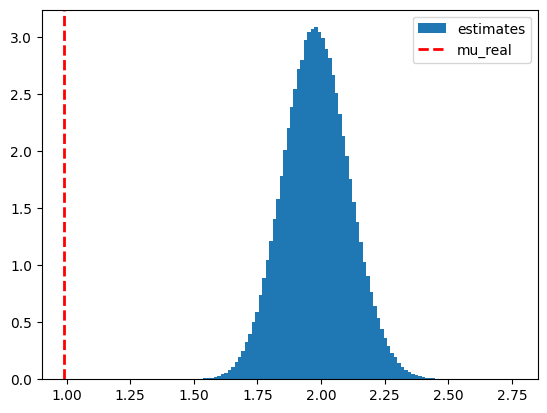

In [5]:
plt.hist(mu_hat_old, bins=100, density=True, label='estimates');
plt.axvline(mu_real, ymin=0, ymax=2, color='red', linestyle='dashed', lw=2, label='mu_real')
plt.legend();

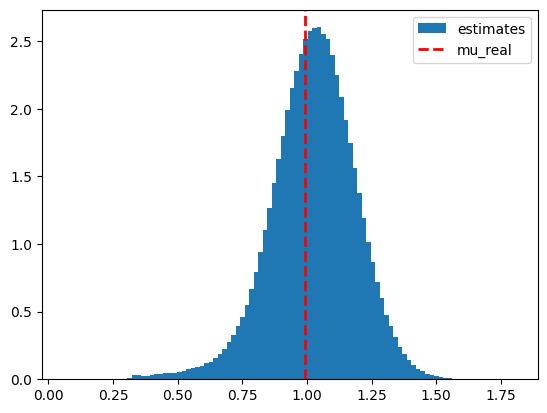

In [6]:
plt.hist(mu_hat_new, bins=100, density=True, label='estimates');
plt.axvline(mu_real, ymin=0, ymax=2, color='red', linestyle='dashed', lw=2, label='mu_real')
plt.legend();